|  Column name  |  Description  |
| ----- | ------- |
| Num_posts        | Number of total posts that the user has ever posted   |
| Num_following    | Number of following                                   |
| Num_followers    | Number of followers                                   |
| Biography_length | Length (number of characters) of the user's biography |
| Picture_availability | Value 0 if the user has no profile picture, or 1 if has |
| Link_availability| Value 0 if the user has no external URL, or 1 if has |
| Average_caption_length | The average number of character of captions in media |
| Caption_zero     | Percentage (0.0 to 1.0) of captions that has almost zero (<=3) length |
| Non_image_percentage | Percentage (0.0 to 1.0) of non-image media. There are three types of media on an Instagram post, i.e. image, video, carousel
| Engagement_rate_like | Engagement rate (ER) is commonly defined as (num likes) divide by (num media) divide by (num followers)
| Engagement_rate_comment | Similar to ER like, but it is for comments |
| Location_tag_percentage | Percentage (0.0 to 1.0) of posts tagged with location |
| Average_hashtag_count   | Average number of hashtags used in a post |
| Promotional_keywords | Average use of promotional keywords in hashtag, i.e. regrann, contest, repost, giveaway, mention, share, give away, quiz |
| Followers_keywords | Average use of followers hunter keywords in hashtag, i.e. follow, like, folback, follback, f4f|
| Cosine_similarity  | Average cosine similarity of between all pair of two posts a user has |
| Post_interval      | Average interval between posts (in hours) |
| real_fake          | r (real/authentic user), f (fake user/bought followers) |

# Q1: Import labraries

In [45]:
# To ignore warnings
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Q2: Read instagram_users.csv file

In [46]:
df = pd.read_csv('instagram_users.csv')

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64244 entries, 0 to 64243
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0    Num_posts               64244 non-null  int64  
 1   Num_following            64244 non-null  int64  
 2   Num_followers            64244 non-null  int64  
 3   Biography_length         64244 non-null  int64  
 4   Picture_availability     64244 non-null  int64  
 5   Link_availability        64244 non-null  int64  
 6   Average_caption_length   64244 non-null  int64  
 7   Caption_zero             64244 non-null  float64
 8   Non_image_percentage     64244 non-null  float64
 9   Engagement_rate_like     64244 non-null  float64
 10  Engagement_rate_comment  64244 non-null  float64
 11  Location_tag_percentage  64244 non-null  float64
 12  Average_hashtag_count    64244 non-null  float64
 13  Promotional_keywords     64244 non-null  float64
 14  Followers_keywords    

# Q3: Split tha dataset into training and testing

In [48]:
X = df.drop('real_fake',axis=1)
y = df['real_fake']

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

# Q4: Build three machine models 

## Q4.1: The first machine model
- Print the model's name.
- Print the model's accuracy.
- Print the model's confusion matrix.

In [51]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

In [52]:
dtree = DecisionTreeClassifier()

In [53]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [54]:
predictions = dtree.predict(X_test)

In [55]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

        fake       0.85      0.85      0.85      9606
        real       0.85      0.85      0.85      9668

    accuracy                           0.85     19274
   macro avg       0.85      0.85      0.85     19274
weighted avg       0.85      0.85      0.85     19274



In [56]:
print(confusion_matrix(y_test,predictions))


[[8171 1435]
 [1405 8263]]


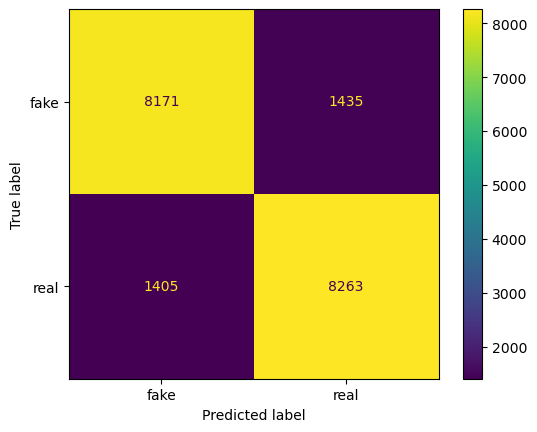

In [57]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, predictions, labels=dtree.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=dtree.classes_)
disp.plot()
plt.show()

## Q4.2: The second machine model
- Print the model's name.
- Print the model's accuracy.
- Print the model's confusion matrix.

In [58]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 20, criterion = 'gini', max_depth = 4) 
rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=4, n_estimators=20)

In [59]:
rfc_pred = rfc.predict(X_test)

In [60]:
print(confusion_matrix(y_test,rfc_pred))

[[7278 2328]
 [ 303 9365]]


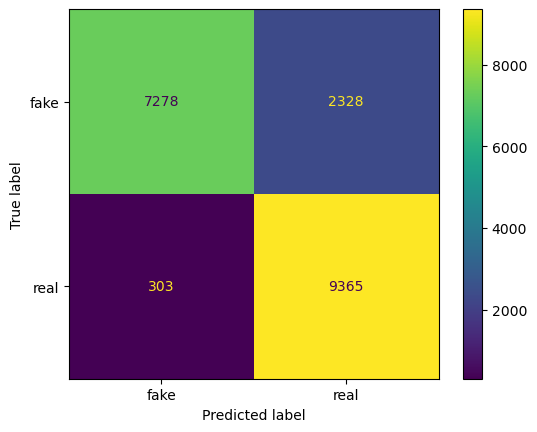

In [61]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, rfc_pred, labels=rfc.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=rfc.classes_)
disp.plot()
plt.show()

In [62]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

        fake       0.96      0.76      0.85      9606
        real       0.80      0.97      0.88      9668

    accuracy                           0.86     19274
   macro avg       0.88      0.86      0.86     19274
weighted avg       0.88      0.86      0.86     19274



## Q4.3: The third machine model
- Print the model's name.
- Print the model's accuracy.
- Print the model's confusion matrix.

In [63]:
from sklearn.svm import SVC
svc=SVC() 
svc

SVC()

In [64]:
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)

In [65]:
#Step 3: Confusion Matrix and Evalution matrix
from sklearn.metrics import confusion_matrix
import sklearn.metrics as metrics

SVM_acc = accuracy_score(y_test, y_pred)
print('Accuracy is: ',SVM_acc)
print('Misclassification Rate',1 - metrics.accuracy_score(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
cm
print(classification_report(y_test,y_pred))

Accuracy is:  0.711217183770883
Misclassification Rate 0.28878281622911695
              precision    recall  f1-score   support

        fake       0.78      0.58      0.67      9606
        real       0.67      0.84      0.74      9668

    accuracy                           0.71     19274
   macro avg       0.73      0.71      0.71     19274
weighted avg       0.73      0.71      0.71     19274



In [66]:
print(confusion_matrix(y_test,y_pred))

[[5592 4014]
 [1552 8116]]


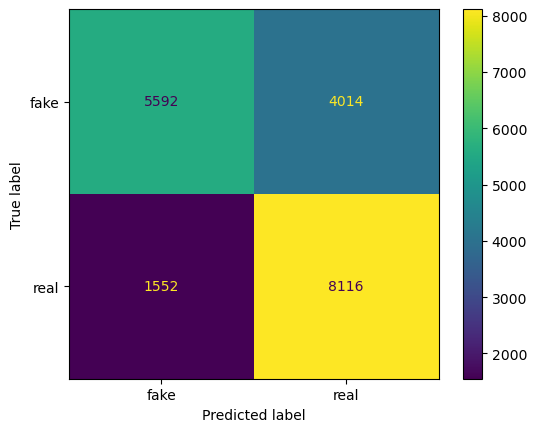

In [67]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred, labels=svc.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=svc.classes_)
disp.plot()
plt.show()